In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

##CNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, MaxPooling1D, Dropout


##LSTM

from tensorflow.keras.layers import LSTM

##BiLSTM
from tensorflow.keras.layers import Bidirectional

##Trnsf
from tensorflow.keras.layers import Input, MultiHeadAttention, GlobalAveragePooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.sequence import pad_sequences





In [2]:
train_df  = pd.read_csv("C:/Users/Lenovo/Downloads/archive (2)/mitbih_train.csv", header=None)
test_df  = pd.read_csv("C:/Users/Lenovo/Downloads/archive (2)/mitbih_test.csv", header=None)

X_train = train_df.iloc[:, :-1].values
y_train = train_df.iloc[:, -1].values
X_test = test_df.iloc[:, :-1].values
y_test = test_df.iloc[:, -1].values

# Normalize 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# One-hot encode 
encoder = OneHotEncoder(sparse=False)
y_train = encoder.fit_transform(y_train.reshape(-1, 1))
y_test = encoder.transform(y_test.reshape(-1, 1))

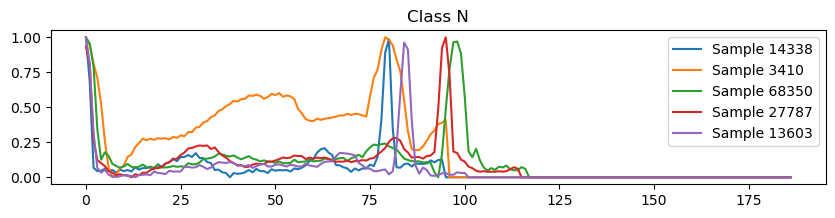

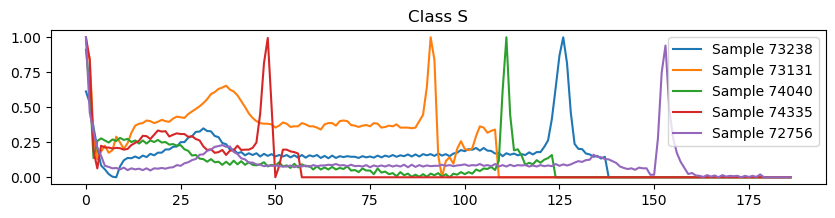

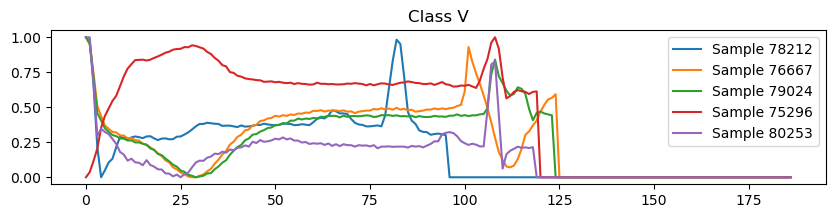

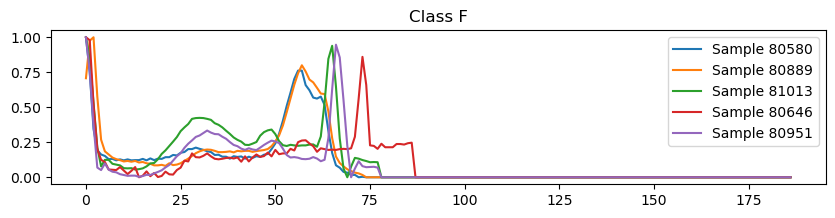

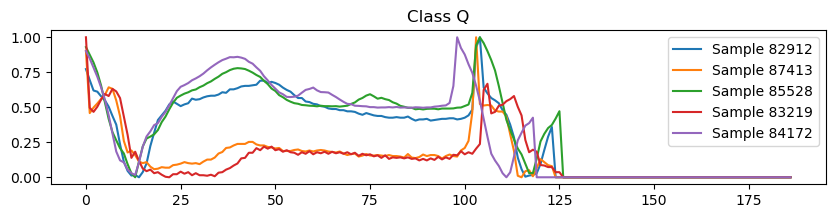

In [3]:
class_labels = {0: 'N', 1: 'S', 2: 'V', 3: 'F', 4: 'Q'}

for class_id, label in class_labels.items():
    plt.figure(figsize=(10, 2))
    class_data = train_df[train_df[187] == class_id]
    samples = class_data.sample(n=5)

    for i, row in samples.iterrows():
        plt.plot(row[:-1], label=f'Sample {i+1}')
    
    plt.title(f'Class {label}')
    plt.legend()
    plt.show()

**CNN**

In [4]:
model_CNN = Sequential([
    Conv1D(64, 3, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(2),
    Dropout(0.5),
    Conv1D(128, 3, activation='relu'),
    MaxPooling1D(2),
    Dropout(0.5),
    Flatten(),
    Dense(100, activation='relu'),
    Dense(5, activation='softmax')
])

model_CNN.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_CNN.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 185, 64)        │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 92, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 92, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 90, 128)        │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 45, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 45, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 5760)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       576,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           505 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 601,565 (2.29 MB)

 Trainable params: 601,565 (2.29 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

history = model_CNN.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=32)


Epoch 1/10
2737/2737 ━━━━━━━━━━━━━━━━━━━━ 71s 24ms/step - accuracy: 0.9187 - loss: 0.2925 - val_accuracy: 0.9637 - val_loss: 0.1330
Epoch 2/10
2737/2737 ━━━━━━━━━━━━━━━━━━━━ 74s 27ms/step - accuracy: 0.9617 - loss: 0.1384 - val_accuracy: 0.9723 - val_loss: 0.1091
Epoch 3/10
2737/2737 ━━━━━━━━━━━━━━━━━━━━ 66s 24ms/step - accuracy: 0.9686 - loss: 0.1118 - val_accuracy: 0.9727 - val_loss: 0.0981
Epoch 4/10
2737/2737 ━━━━━━━━━━━━━━━━━━━━ 75s 27ms/step - accuracy: 0.9721 - loss: 0.0974 - val_accuracy: 0.9738 - val_loss: 0.0964
Epoch 5/10
2737/2737 ━━━━━━━━━━━━━━━━━━━━ 84s 31ms/step - accuracy: 0.9729 - loss: 0.0947 - val_accuracy: 0.9772 - val_loss: 0.0859
Epoch 6/10
2737/2737 ━━━━━━━━━━━━━━━━━━━━ 69s 25ms/step - accuracy: 0.9755 - loss: 0.0858 - val_accuracy: 0.9770 - val_loss: 0.0822
Epoch 7/10
2737/2737 ━━━━━━━━━━━━━━━━━━━━ 61s 22ms/step - accuracy: 0.9756 - loss: 0.0840 - val_accuracy: 0.9783 - val_loss: 0.0813
Epoch 8/10
2737/2737 ━━━━━━━━━━━━━━━━━━━━ 59s 22ms/step - accuracy: 0.9792 -

685/685 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9938 - loss: 0.0307
Test accuracy: 98.05%


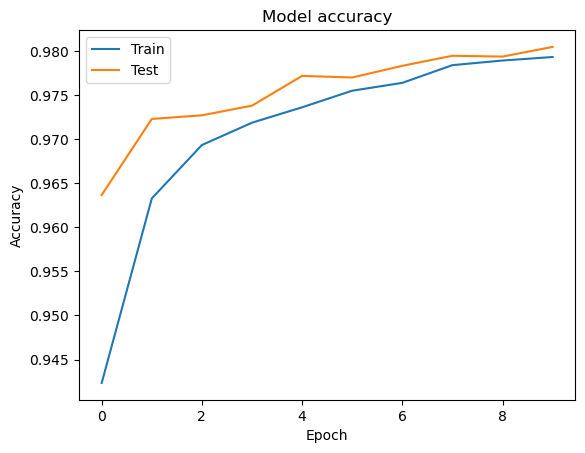

In [6]:
loss, accuracy = model_CNN.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy*100:.2f}%')

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [7]:
from sklearn.metrics import confusion_matrix

y_pred = model_CNN.predict(X_test)

y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)


conf_matrix = confusion_matrix(y_true_labels, y_pred_labels)

def calculate_metrics(conf_matrix):
    precision = np.diag(conf_matrix) / np.sum(conf_matrix, axis=0)
    sensitivity = np.diag(conf_matrix) / np.sum(conf_matrix, axis=1)
    specificity = np.diag(np.sum(conf_matrix, axis=1) - conf_matrix) / np.sum(np.sum(conf_matrix, axis=1) - conf_matrix, axis=0)
    return precision, sensitivity, specificity

precision, sensitivity, specificity = calculate_metrics(conf_matrix)

print("Confusion Matrix:")
print(conf_matrix)
print("\nPrecision:", precision)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)


685/685 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step
Confusion Matrix:
[[18045    28    32     7     6]
 [  169   377    10     0     0]
 [   66     3  1358    17     4]
 [   26     0    20   116     0]
 [   33     1     5     0  1569]]

Precision: [0.98396859 0.92176039 0.95298246 0.82857143 0.99366688]
Sensitivity (Recall): [0.99597086 0.67805755 0.9378453  0.71604938 0.97574627]
Specificity: [0.00101037 0.07549557 0.01547721 0.06865672 0.00603622]


**LSTM**

In [10]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))


In [11]:
model_LSTM = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.5),
    LSTM(50),
    Dropout(0.5),
    Dense(50, activation='relu'),
    Dense(5, activation='softmax')
])

model_LSTM.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_LSTM.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 187, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 187, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │           255 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,405 (130.49 KB)

 Trainable params: 33,405 (130.49 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
history = model_LSTM.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test), batch_size=64)


Epoch 1/5
1369/1369 ━━━━━━━━━━━━━━━━━━━━ 326s 233ms/step - accuracy: 0.8170 - loss: 0.7362 - val_accuracy: 0.8276 - val_loss: 0.6300
Epoch 2/5
1369/1369 ━━━━━━━━━━━━━━━━━━━━ 332s 242ms/step - accuracy: 0.8260 - loss: 0.6478 - val_accuracy: 0.8282 - val_loss: 0.6329
Epoch 3/5
1369/1369 ━━━━━━━━━━━━━━━━━━━━ 354s 258ms/step - accuracy: 0.8287 - loss: 0.6351 - val_accuracy: 0.8293 - val_loss: 0.6323
Epoch 4/5
1369/1369 ━━━━━━━━━━━━━━━━━━━━ 326s 238ms/step - accuracy: 0.8266 - loss: 0.6507 - val_accuracy: 0.8285 - val_loss: 0.6387
Epoch 5/5
1369/1369 ━━━━━━━━━━━━━━━━━━━━ 331s 241ms/step - accuracy: 0.8302 - loss: 0.5827 - val_accuracy: 0.8540 - val_loss: 0.4886


685/685 ━━━━━━━━━━━━━━━━━━━━ 43s 62ms/step - accuracy: 0.9457 - loss: 0.2342
Test accuracy: 85.40%


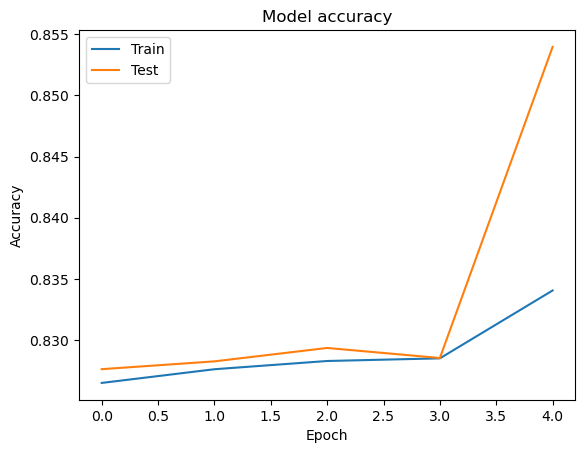

In [13]:
loss, accuracy = model_LSTM.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy*100:.2f}%')

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [14]:

y_pred = model_LSTM.predict(X_test)


y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

conf_matrix = confusion_matrix(y_true_labels, y_pred_labels)

# Calculate precision, sensitivity (recall), and specificity
def calculate_metrics(conf_matrix):
    precision = np.diag(conf_matrix) / np.sum(conf_matrix, axis=0)
    sensitivity = np.diag(conf_matrix) / np.sum(conf_matrix, axis=1)
    specificity = np.diag(np.sum(conf_matrix, axis=1) - conf_matrix) / np.sum(np.sum(conf_matrix, axis=1) - conf_matrix, axis=0)
    return precision, sensitivity, specificity

precision, sensitivity, specificity = calculate_metrics(conf_matrix)

print("Confusion Matrix:")
print(conf_matrix)
print("\nPrecision:", precision)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)


685/685 ━━━━━━━━━━━━━━━━━━━━ 43s 62ms/step
Confusion Matrix:
[[17372    70    46     0   630]
 [  491    43    15     0     7]
 [ 1063     3   167     0   215]
 [  162     0     0     0     0]
 [  495     0     0     0  1113]]

Precision: [0.88709595 0.37068966 0.73245614        nan 0.56641221]
Sensitivity (Recall): [0.95882548 0.07733813 0.11533149 0.         0.69216418]
Specificity: [0.01050601 0.19256757 0.18268682 0.2        0.08148148]


**TRANSFORMER**

In [16]:
#padding
max_length = max(X_train.shape[1], X_test.shape[1])

X_train_padded = pad_sequences(X_train, maxlen=max_length, padding='post')
X_test_padded = pad_sequences(X_test, maxlen=max_length, padding='post')

X_train_padded = X_train_padded.reshape((X_train_padded.shape[0], X_train_padded.shape[1], 1))
X_test_padded = X_test_padded.reshape((X_test_padded.shape[0], X_test_padded.shape[1], 1))


In [17]:
def transformer_encoder(inputs):
    # Multi-head attention
    x = MultiHeadAttention(num_heads=2, key_dim=64)(inputs, inputs)
    x = Dropout(0.1)(x)
    return x

input_layer = Input(shape=(max_length, 1))

# Transf Layer
x = transformer_encoder(input_layer)
x = transformer_encoder(x)

# Pooling , dense layers
x = GlobalAveragePooling1D()(x)
x = Dropout(0.1)(x)
x = Dense(50, activation='relu')(x)
output_layer = Dense(5, activation='softmax')(x)

model_trnsf = Model(inputs=input_layer, outputs=output_layer)
model_trnsf.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_trnsf.summary()


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 187, 1)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 187, 1)    │        897 │ input_layer_2[0]… │
│ (MultiHeadAttentio… │                   │            │ input_layer_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_5 (Dropout) │ (None, 187, 1)    │          0 │ multi_head_atten… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 187, 1)    │        897 │ dropout_5[0][0],  │
│ (MultiHeadAttentio… │                   │            │ dropout_5[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_7 (Dropout) │ (None, 187, 1)    │          0 │ multi_head_atten… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 1)         │          0 │ dropout_7[0][0]   │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_8 (Dropout) │ (None, 1)         │          0 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 50)        │        100 │ dropout_8[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 5)         │        255 │ dense_4[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 2,149 (8.39 KB)

 Trainable params: 2,149 (8.39 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
history = model_trnsf.fit(X_train_padded, y_train, epochs=5, validation_data=(X_test_padded, y_test), batch_size=32)


Epoch 1/5
2737/2737 ━━━━━━━━━━━━━━━━━━━━ 264s 93ms/step - accuracy: 0.8249 - loss: 0.6966 - val_accuracy: 0.8313 - val_loss: 0.6112
Epoch 2/5
2737/2737 ━━━━━━━━━━━━━━━━━━━━ 255s 93ms/step - accuracy: 0.8313 - loss: 0.6011 - val_accuracy: 0.8347 - val_loss: 0.6074
Epoch 3/5
2737/2737 ━━━━━━━━━━━━━━━━━━━━ 247s 90ms/step - accuracy: 0.8328 - loss: 0.5949 - val_accuracy: 0.8340 - val_loss: 0.6017
Epoch 4/5
2737/2737 ━━━━━━━━━━━━━━━━━━━━ 252s 92ms/step - accuracy: 0.8335 - loss: 0.5921 - val_accuracy: 0.8335 - val_loss: 0.5916
Epoch 5/5
2737/2737 ━━━━━━━━━━━━━━━━━━━━ 260s 95ms/step - accuracy: 0.8331 - loss: 0.5918 - val_accuracy: 0.8275 - val_loss: 0.6135


685/685 ━━━━━━━━━━━━━━━━━━━━ 25s 37ms/step - accuracy: 0.9605 - loss: 0.3048
Test accuracy: 82.75%


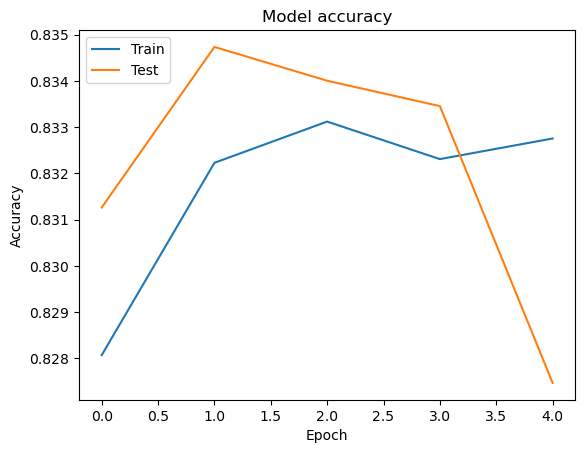

In [19]:
loss, accuracy = model_trnsf.evaluate(X_test_padded, y_test)
print(f'Test accuracy: {accuracy*100:.2f}%')

import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [20]:

y_pred = model_trnsf.predict(X_test_padded)


y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

conf_matrix = confusion_matrix(y_true_labels, y_pred_labels)

def calculate_metrics(conf_matrix):
    precision = np.diag(conf_matrix) / np.sum(conf_matrix, axis=0)
    sensitivity = np.diag(conf_matrix) / np.sum(conf_matrix, axis=1)
    specificity = np.diag(np.sum(conf_matrix, axis=1) - conf_matrix) / np.sum(np.sum(conf_matrix, axis=1) - conf_matrix, axis=0)
    return precision, sensitivity, specificity

precision, sensitivity, specificity = calculate_metrics(conf_matrix)

print("Confusion Matrix:")
print(conf_matrix)
print("\nPrecision:", precision)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)


685/685 ━━━━━━━━━━━━━━━━━━━━ 27s 38ms/step
Confusion Matrix:
[[17665     0   110     0   343]
 [  511     0    22     0    23]
 [ 1186     0    53     0   209]
 [  161     0     1     0     0]
 [ 1211     0     0     0   397]]

Precision: [0.85198225        nan 0.28494624        nan 0.40843621]
Sensitivity (Recall): [0.97499724 0.         0.03660221 0.         0.24689055]
Specificity: [0.00648477 0.2        0.19776014 0.2        0.1713356 ]


**BiLSTM**

In [22]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))


In [23]:
model_BiLSTM = Sequential([
    Bidirectional(LSTM(64, return_sequences=True), input_shape=(X_train.shape[1], 1)),
    Dropout(0.5),
    Bidirectional(LSTM(64)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(5, activation='softmax')
])

model_BiLSTM.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_BiLSTM.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ (None, 187, 128)       │        33,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 187, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 128)            │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 141,189 (551.52 KB)

 Trainable params: 141,189 (551.52 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
history = model_BiLSTM.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test), batch_size=64)


Epoch 1/5
1369/1369 ━━━━━━━━━━━━━━━━━━━━ 623s 445ms/step - accuracy: 0.8882 - loss: 0.4270 - val_accuracy: 0.9486 - val_loss: 0.1914
Epoch 2/5
1369/1369 ━━━━━━━━━━━━━━━━━━━━ 537s 383ms/step - accuracy: 0.9492 - loss: 0.1937 - val_accuracy: 0.9576 - val_loss: 0.1529
Epoch 3/5
1369/1369 ━━━━━━━━━━━━━━━━━━━━ 457s 334ms/step - accuracy: 0.9530 - loss: 0.1703 - val_accuracy: 0.9621 - val_loss: 0.1337
Epoch 4/5
1369/1369 ━━━━━━━━━━━━━━━━━━━━ 512s 374ms/step - accuracy: 0.9593 - loss: 0.1477 - val_accuracy: 0.9528 - val_loss: 0.1776
Epoch 5/5
1369/1369 ━━━━━━━━━━━━━━━━━━━━ 536s 391ms/step - accuracy: 0.9599 - loss: 0.1472 - val_accuracy: 0.9664 - val_loss: 0.1248


685/685 ━━━━━━━━━━━━━━━━━━━━ 81s 118ms/step - accuracy: 0.9882 - loss: 0.0481
Test accuracy: 96.64%


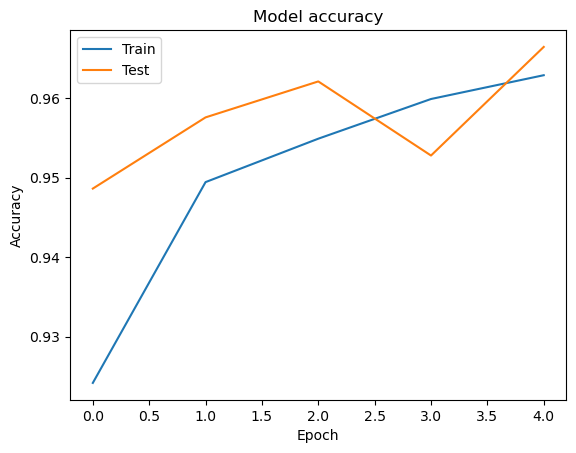

In [25]:
loss, accuracy = model_BiLSTM.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy*100:.2f}%')

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [26]:

y_pred = model_BiLSTM.predict(X_test_padded)

y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

conf_matrix = confusion_matrix(y_true_labels, y_pred_labels)

def calculate_metrics(conf_matrix):
    precision = np.diag(conf_matrix) / np.sum(conf_matrix, axis=0)
    sensitivity = np.diag(conf_matrix) / np.sum(conf_matrix, axis=1)
    specificity = np.diag(np.sum(conf_matrix, axis=1) - conf_matrix) / np.sum(np.sum(conf_matrix, axis=1) - conf_matrix, axis=0)
    return precision, sensitivity, specificity

precision, sensitivity, specificity = calculate_metrics(conf_matrix)

print("Confusion Matrix:")
print(conf_matrix)
print("\nPrecision:", precision)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)


685/685 ━━━━━━━━━━━━━━━━━━━━ 77s 109ms/step
Confusion Matrix:
[[17473   274    79    29   263]
 [  466    70    17     1     2]
 [  484    33   852     2    77]
 [  133     0    27     0     2]
 [  316   125    50     0  1117]]

Precision: [0.92586901 0.13944223 0.83121951 0.         0.76454483]
Sensitivity (Recall): [0.96440004 0.12589928 0.58839779 0.         0.69465174]
Specificity: [0.00899356 0.21334504 0.09589702 0.20822622 0.0746314 ]
